In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import scipy.io as sio
import copy
import scipy.fftpack
import seaborn as sns
sns.set()

In [2]:
## general simulation parameters
fs = 1024
npnts = fs*5+1 # 5 seconds
# centered time vector
timevec = np.arange(0,npnts)/fs
timevec = timevec - np.mean(timevec)
# for power spectrum
hz = np.linspace(0,fs/2,int(np.floor(npnts/2)+1))

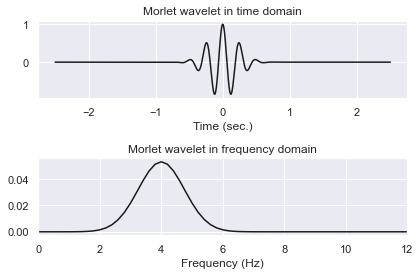

In [3]:
## Morlet wavelet
# parameters
freq = 4 # peak frequency
csw  = np.cos(2*np.pi*freq*timevec) # cosine wave
fwhm = .5 # full-width at half-maximum in seconds
gaussian = np.exp( -(4*np.log(2)*timevec**2) / fwhm**2 ) # Gaussian
# Morlet wavelet
MorletWavelet = csw * gaussian #  по сути произведение синуса и Гаусса
# amplitude spectrum
MorletWaveletPow = np.abs(scipy.fftpack.fft(MorletWavelet)/npnts)
# time-domain plotting
plt.subplot(211)
plt.plot(timevec,MorletWavelet,'k')
plt.xlabel('Time (sec.)')
plt.title('Morlet wavelet in time domain')
# frequency-domain plotting
plt.subplot(212)
plt.plot(hz,MorletWaveletPow[:len(hz)],'k')
plt.xlim([0,freq*3])
plt.xlabel('Frequency (Hz)')
plt.title('Morlet wavelet in frequency domain')
plt.tight_layout()
plt.show()

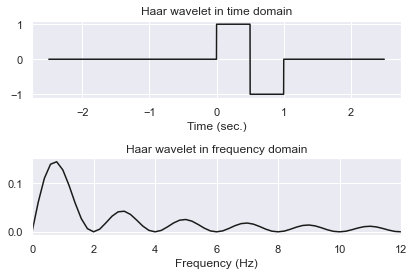

In [4]:
## Haar wavelet

# create Haar wavelet
HaarWavelet = np.zeros(npnts)
HaarWavelet[np.argmin(timevec**2) : np.argmin((timevec-.5)**2) ] = 1
HaarWavelet[np.argmin((timevec-.5)**2) : np.argmin((timevec-1-1/fs)**2)] = -1
# amplitude spectrum
HaarWaveletPow = np.abs(scipy.fftpack.fft(HaarWavelet)/npnts)
# time-domain plotting
plt.subplot(211)
plt.plot(timevec,HaarWavelet,'k')
plt.xlabel('Time (sec.)')
plt.title('Haar wavelet in time domain')
# frequency-domain plotting
plt.subplot(212)
plt.plot(hz,HaarWaveletPow[:len(hz)],'k')
plt.xlim([0,freq*3])
plt.xlabel('Frequency (Hz)')
plt.title('Haar wavelet in frequency domain')
plt.tight_layout()
plt.show()

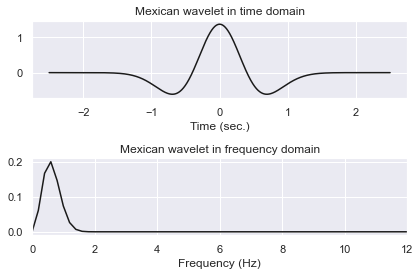

In [5]:
## Mexican hat wavelet
# the wavelet
s = .4
MexicanWavelet = (2/(np.sqrt(3*s)*np.pi**.25)) * (1- (timevec**2)/(s**2) ) * np.exp( (-timevec**2)/(2*s**2) )
# amplitude spectrum
MexicanPow = np.abs(scipy.fftpack.fft(MexicanWavelet)/npnts)
# time-domain plotting
plt.subplot(211)
plt.plot(timevec,MexicanWavelet,'k')
plt.xlabel('Time (sec.)')
plt.title('Mexican wavelet in time domain')
# frequency-domain plotting
plt.subplot(212)
plt.plot(hz,MexicanPow[:len(hz)],'k')
plt.xlim([0,freq*3])
plt.xlabel('Frequency (Hz)')
plt.title('Mexican wavelet in frequency domain')
plt.tight_layout()
plt.show()

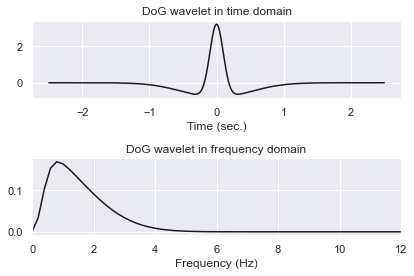

In [6]:
## Difference of Gaussians (DoG)
# (approximation of Laplacian of Gaussian)
# define sigmas
sPos = .1
sNeg = .5
# create the two GAussians
gaus1 = np.exp( (-timevec**2) / (2*sPos**2) ) / (sPos*np.sqrt(2*np.pi))
gaus2 = np.exp( (-timevec**2) / (2*sNeg**2) ) / (sNeg*np.sqrt(2*np.pi))
# their difference is the DoG
DoG = gaus1 - gaus2
# amplitude spectrum
DoGPow = np.abs(scipy.fftpack.fft(DoG)/npnts)
# time-domain plotting
plt.subplot(211)
plt.plot(timevec,DoG,'k')
plt.xlabel('Time (sec.)')
plt.title('DoG wavelet in time domain')
# frequency-domain plotting
plt.subplot(212)
plt.plot(hz,DoGPow[:len(hz)],'k')
plt.xlim([0,freq*3])
plt.xlabel('Frequency (Hz)')
plt.title('DoG wavelet in frequency domain')
plt.tight_layout()
plt.show()


---
# : Convolution with wavelets
---


In [7]:
## general simulation parameters
fs = 1024
npnts = fs*5 # 5 seconds
# centered time vector
timevec = np.arange(0,npnts)/fs
timevec = timevec - np.mean(timevec)
# for power spectrum
hz = np.linspace(0,fs/2,int(np.floor(npnts/2)+1))

In [8]:
### create wavelets
# parameters
freq = 4 # peak frequency
csw  = np.cos(2*np.pi*freq*timevec) # cosine wave
fwhm = .5 # full-width at half-maximum in seconds
gaussian = np.exp( -(4*np.log(2)*timevec**2) / fwhm**2 ) # Gaussian
## Morlet wavelet
MorletWavelet = csw * gaussian
## Haar wavelet
HaarWavelet = np.zeros(npnts)
HaarWavelet[np.argmin(timevec**2) : np.argmin( (timevec-.5)**2 )] = 1
HaarWavelet[np.argmin((timevec-.5)**2) : np.argmin( (timevec-1-1/fs)**2 )] = -1
## Mexican hat wavelet
s = .4
MexicanWavelet = (2/(np.sqrt(3*s)*np.pi**.25)) * (1- (timevec**2)/(s**2) ) * np.exp( (-timevec**2)/(2*s**2) )

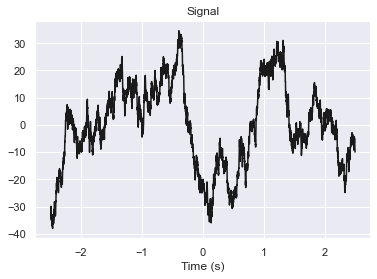

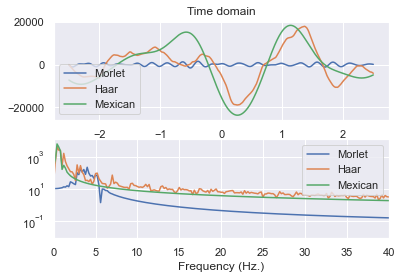

In [9]:
## convolve with random signal
# signal
signal1 = scipy.signal.detrend(np.cumsum(np.random.randn(npnts)))
# convolve signal with different wavelets
morewav = np.convolve(signal1,MorletWavelet,'same')
haarwav = np.convolve(signal1,HaarWavelet,'same')
mexiwav = np.convolve(signal1,MexicanWavelet,'same')
# amplitude spectra
morewaveAmp = np.abs(scipy.fftpack.fft(morewav)/npnts)
haarwaveAmp = np.abs(scipy.fftpack.fft(haarwav)/npnts)
mexiwaveAmp = np.abs(scipy.fftpack.fft(mexiwav)/npnts)
### plotting
# the signal
plt.plot(timevec,signal1,'k')
plt.title('Signal')
plt.xlabel('Time (s)')
plt.show()
# the convolved signals
plt.subplot(211)
plt.plot(timevec,morewav,label='Morlet')
plt.plot(timevec,haarwav,label='Haar')
plt.plot(timevec,mexiwav,label='Mexican')
plt.title('Time domain')
plt.legend()
# spectra of convolved signals
plt.subplot(212)
plt.plot(hz,morewaveAmp[:len(hz)],label='Morlet')
plt.plot(hz,haarwaveAmp[:len(hz)],label='Haar')
plt.plot(hz,mexiwaveAmp[:len(hz)],label='Mexican')
plt.yscale('log')
plt.xlim([0,40])
plt.legend()
plt.xlabel('Frequency (Hz.)')
# plt.tight_layout()
plt.show()